### Analyzing the Stroop Effect

The effect is named after John Ridley Stroop, the effect was published in 1929. A psychological test was created based on the Stroop effect and is widely used in clinical practice and became the standard test of studies on attention, with over 700 studies sought to explain some nuance of the Stroop effect.

#### Background Information
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

**Independent variable** is a variable which is intentionally manipulated or selected by an experimenter in order to determine its effect on the dependent variable.
**Dependent variable** is a responce variable being measured, the changes of dependent variables are associated with changes in the independent variables.

For instance, in a Stroop experiment the congruent and incongruent word sets can be considered an independent variable, thus dependent variable will be the time it took a subject to name the words and colours in a set.

### Deriving hypothesis

By performing the following test we aim to determine whether the Stroop Test has a tangible effect on a participants' responce time.  

Null hypothesis: The mean time it takes a participant to read congruent set of words *$\mu_{con}$* is equal or greater than mean time for incongruent set of words.  
Alternative hypothesis: The mean time it takes a participant to read congruent set of words *$\mu_{con}$* is significantly lower than mean time for incongruent set of words *$\mu_{inc}$*.
$$ H_0: \mu_{con} - \mu_{inc} \geq 0$$
$$ H_1: \mu_{con} - \mu_{inc} < 0$$

### Descriptive statistics.

In [38]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Load the data
df = pd.read_csv('stroopdata.csv')
df.head(2)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


This small dataset is clean with no null values, there is no need to clean or alter the data.

In [40]:
# Calculate Mean
mean_con = round(df['Congruent'].mean(),4)
mean_inc = round(df['Incongruent'].mean(),4)
print('Mean \n Congruent: {} \n Incongruent: {}'.format(mean_con,mean_inc))

Mean 
 Congruent: 14.0511 
 Incongruent: 22.0159


In [41]:
# Calculate Median
med_con = round(df['Congruent'].median(),4)
med_inc = round(df['Incongruent'].median(),4)
print('Madian\n Congruent: {} \n Incongruent: {}'.format(med_con,med_inc))

Madian
 Congruent: 14.3565 
 Incongruent: 21.0175


In [42]:
# Calculate Standard Deviation
std_con = round(df['Congruent'].std(),4)
std_inc = round(df['Incongruent'].std(),4)
print('Standard Deviation \n Congruent: {}\n Incongruent: {}'.format(std_con,std_inc))

Standard Deviation 
 Congruent: 3.5594
 Incongruent: 4.7971


In [43]:
# Calculate Variance
var_con = round(df['Congruent'].var(),4)
var_inc = round(df['Incongruent'].var(),4)
print('Variance \n Congruent: {} \n Incongruent: {}'.format(var_con,var_inc))

Variance 
 Congruent: 12.669 
 Incongruent: 23.0118


In [44]:
# Calculate Inter Quartile Range
IQR_con = round(stats.iqr(df['Congruent']),4)
IQR_inc = round(stats.iqr(df['Incongruent']),4)
print('Inter Quartile Range \n Congruent: {} \n Incongruent: {}'.format(IQR_con,IQR_inc))

Inter Quartile Range 
 Congruent: 4.3055 
 Incongruent: 5.3348


In [45]:
# Calculate the difference mean and standard deviation
mean_diff = round((df['Congruent']-df['Incongruent']).mean(),4)
mean_std = round((df['Congruent']-df['Incongruent']).std(),4)
print('Mean of Difference: {} \nStandard Deviation of Difference: {}'.format(mean_diff,mean_std))

Mean of Difference: -7.9648 
Standard Deviation of Difference: 4.8648


The mean responce time for participants reading Cingruent set of words (14.05 seconds) is observed to be signifficantly smaller than the responce time in the Incongruent condition (22.01 seconds). Looking at the Inter Quartile Range - Incongruent data is more spread.

A T-test for paired samples will be used for this analysis for the following reasons: 
- The main objective is to see if there is a significant difference in the recognition times of Congruent and Incongruent word sets, from provided sample of 24 entries.
- The data is quantitative and paired, meaning it holds measurements collected under two different conditions but from the same group of participants.

### Visualizations that show the distribution of the sample data.

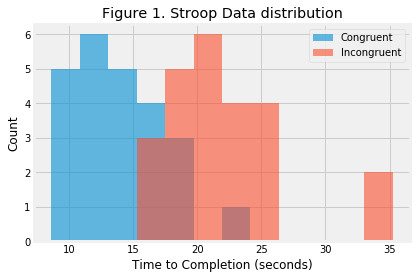

In [46]:
# Combined distribution
df.plot.hist(title='Figure 1. Stroop Data distribution', stacked=False, alpha = 0.6, bins = 12);
plt.xlabel('Time to Completion (seconds)')
plt.ylabel('Count');

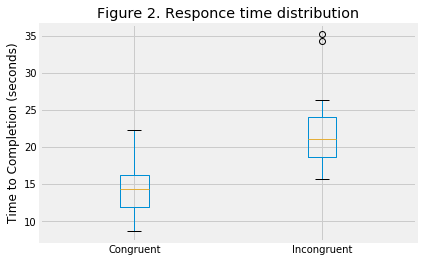

In [47]:
df.plot.box(title='Figure 2. Responce time distribution')
plt.ylabel('Time to Completion (seconds)');

The histograms (Figure 1.) above demonstrate that data is slightly positively skewed.  
The Box plots (Figure 2.) demonstrate that Incongruent data has 2 major outliers - the time of around 35 seconds.  
Both illustrations reinforce the observations that, according to the data provided, the Congruent word set on average was read faster than the Incongruent word set.  

### Statistical test

From the provided hypothesis we perform one-tailed t-test where sample size is 24 and thus degrees of freedom is 23, Type I error threshhold is $\alpha$ < 0.05. The critical t-value for this test is 1.714, determined by looking up the [table](https://cdn-images-1.medium.com/max/1600/1*0_EW4xt4le_SIrmO7z9FPA.png).

In [48]:
# Perform the t-test for paired samples
stats.ttest_rel(df['Congruent'], df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

The t-statistic (-8.020) is over the t-critical value (1.714) under the degrees of freedom (23), this sugests that we should regect the null hypothesis. Lets confirm the observations hold by performing bootstrapping.

In [52]:
# Boot-strapping
con_means, inc_means, diffs = [], [], []
for _ in range(1000):
    bootsamp = df.sample(df.shape[0], replace = True)
    con_mean = (bootsamp['Congruent']).mean()
    inc_mean = (bootsamp['Incongruent']).mean()
    # append the info 
    con_means.append(con_mean)
    inc_means.append(inc_mean)
    diffs.append(con_mean - inc_mean)

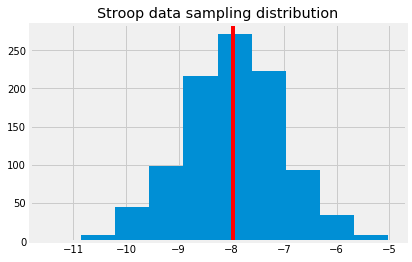

In [53]:
plt.hist(diffs)
plt.title('Stroop data sampling distribution')
# Where is our observed mean diference?
plt.axvline(mean_diff, c='red');

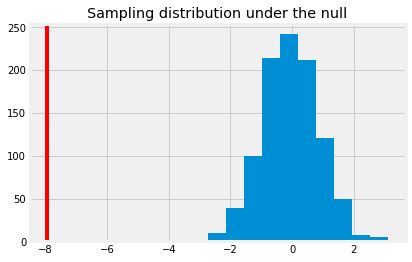

In [55]:
null_vals = np.random.normal(0, np.std(diffs), 1000) # Here are 1000 draws from the sampling distribution under the null
# Plot the sampling distribution of differences under the nul
plt.hist(null_vals)
plt.title('Sampling distribution under the null')
# Where is our observed mean diference?
plt.axvline(mean_diff, c='red');

Looking at the diagram above there is a very strong indication that the null hypothesis does not hold.

We reject the null in favour of alternative hypothesis because the t-statistic (-8.020) is over the t-critical value (1.714) under the degrees of freedom (23). Concluding that participants in a given test have significantly lower response time on the congruent word set compared to incongruent word set. These results are in accordance with the observations and expectation above.

### Further thoughts.

Reading is considered an automated cognitive task, while recalling of colours requires a more complex cognitive activity. There is a large number of similar tasks that demonstrate Stroop Effect, for instance the picture-word interference (PWI) task, where a conflicting word is embedded in a picture. As with the classic version of the task naming what is shown on a picture takes longer on average than reading the written word.

### Resources
Stroop Effect: [JR. Studies of Interference in Serial Verbal Reactions](http://psychclassics.yorku.ca/Stroop/).  
PWI, variant of the Stroop task: [Picture-word interference is a Stroop effect](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5486857/)  
T-test using Python and Numpy: [Towards Data Science](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f).